## Z-Statistics
Shashank Bhushan, 10 Jan 2017

In many of the inferential statistics tasks, what we try and figure out is how probable a given value is in the distribution it belongs to. Z-Statistics is one of the many different ways to answer this question. In Z-Statistics we calculate the z-score which is represents how many standard deviations is a given value from the mean of the distribution. Lets have a look at it's formula

$$ z-score = ( \bar{x} - \mu ) / \sigma$$

Where 

$\bar{x}$ : The mean of the sample

$ \mu $ : The mean of the distribution

$ \sigma $ : The standard deviation of the distribution

z-scores can also be used to standardize a distribution as it basically changes the scales of the distribution so that the mean value of the z-scores will be 0 and the standard deviation 1

In [1]:
# importing the required libraries
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

The mean value of the samples is: 5.00024805623
The standard deviation of the samples is: 1.97104084734


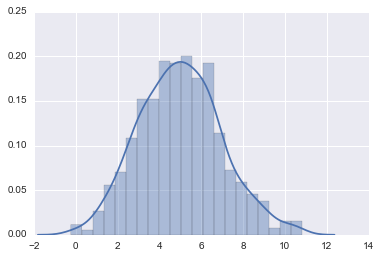

In [2]:
mean = 5
standard_deviation = 2
samples = 1000
# The function returns an array of 1000 randomly selected values from the normal distribution defined using 
# the mean and standard deviation
x = np.random.normal(mean, standard_deviation, 1000)

print 'The mean value of the samples is:', np.mean(x)
print 'The standard deviation of the samples is:', np.std(x)
#lets plot a histogram of the values
sns.distplot(x)

The distribution is quite normal as expected with the mean value close to 5 and a standard deviation near 2. A thing to understand here would be that given the samples are drawn at random the mean and standard deviation cannot be always exactly equal to the population parameters we provided, though if we keep increasing the number of samples we will get much closer

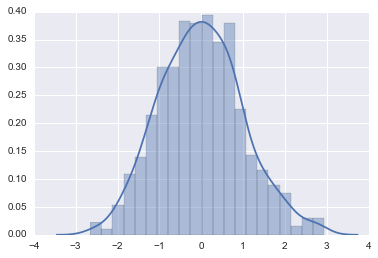

In [3]:
# Lets now define a function to calculate the z-score for each of the values. Though, Numpy does provide 
# an implementation for calculating z-scores, we will be writing a function on our own
def cal_zscore(arr):
    mean = np.mean(arr)
    std = np.std(arr)
    for i, dp in enumerate(arr):
        arr[i] = (dp - mean) / std
    return arr

# Lets calculate the z scores for each individual value
z_scores = cal_zscore(x)

# Lets plot a histogram to see it's distribution
sns.distplot(z_scores)

The distribution is normal again but this time it is centered around 0 instead of 5. The value of the mean and standard deviation will be 0 and 1 respectively. Its is a good exercise to think why 0 and 1 specifically, having a look at the formula again might be of help.

Now lets see what the distribution of the z-scores look like if the distribution is not normal.

The mean value of the samples is: 0.667318982913
The standard deviation of the samples is: 0.242742488243


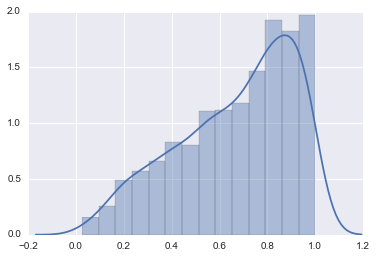

In [24]:
alpha = 2
beta = 1
# Here instead of a normal distribution our samples are taken fron a beta distribution. 
x = np.random.beta(alpha, beta, 1000)

print 'The mean value of the samples is:', np.mean(x)
print 'The standard deviation of the samples is:', np.std(x)
#lets plot a histogram of the values
sns.distplot(x)

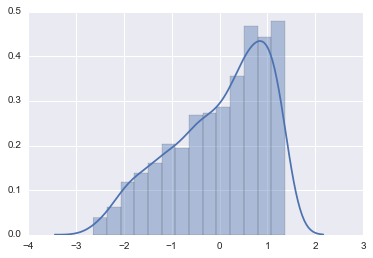

In [25]:
# Lets calculate the z scores for each individual value
z_scores = cal_zscore(x)

# Lets plot a histogram to see it's distribution
sns.distplot(z_scores)

The values in the original distribution had a range between 0 to 1 but the z-scores have value greater 1 as well as less than 0. The mean of the z-scores is again 0 with a standard deviation of 1. An important use of z-scores is to standardize a distribution. Z-scores achieve this by turing the mean to be 0 and the standard deviation to 1.

## Hypothesis Testing
Having seen how a z-score is calculated and how it helps in standardizing values, lets move on to a more interesting use case, how to use it to test hypothesis. If you don't really know what hypothesis testing means you can go through my post on [hypothesis testing](https://monkeydunkey.github.io/blog/HypothesisTesting.html). Just to summarize the whole process of testing a hypothesis, the aim is to calculate the probabilty of a given sample set to belong a given population. For example in the case of the normal distribution above, if we have sample of 100 values a hypothesis test would be to check if those hundred values belong to that normal distribution. Its sounds complicated but it is not so, as per Central Limit Theorem if we let say draw thousands of samples of size 100 from a population and plot their mean, then this distribution will be normal in nature. Lets have a look

## Central Limit Theorem in action

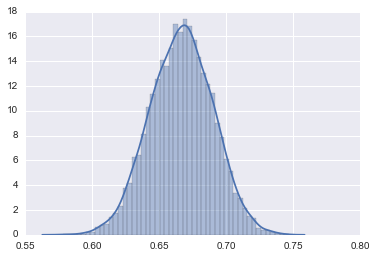

In [5]:
# list to store our sample means
sample_means = []
# we will draw 10000 samples of size 100
for i in range(10000):
# lets use the beta distribution instead of the normal one to make the point clear    
    sample_means.append(np.mean(np.random.beta(2, 1, 100)))
    
sns.distplot(sample_means)

A near perfect normal distribution!! This distribution of the means of many samples is also called distribution of sample means. Going by the example we were following earlier if we were given a sample of size 100 and were asked to decide whether or not it belongs to a beta distribution with $\alpha$: 2 and $\beta$: 1, all we need to do is calculate the mean of the sample see where it lies in the distribution plotted above, if it is very near to the tails then chances are it is not part of the beta distribution. To be a bit more technical, we do need to decide upon a significance level at the start of the test, if you don't understand the meaning of significance level or how it is used. I would suggest to read up on Hypothesis testing, [my blog](https://monkeydunkey.github.io/blog/HypothesisTesting.html) can be a good place to read it too :)

## Back to Hypothesis testing
A very interesting property of the distribution of the sample means is that the mean value of this distribution is same as that of the population from which the samples were drawn from. The Standard deviation of the distribution can also be represented by $\sigma / \sqrt{n}$ where $\sigma$ is the standard deviation of the population and n is the sample size. Thus the updated formula for z-score becomes:
$$ ( \bar{x} - \mu ) / \sigma / \sqrt{n}$$

As the distribution of the sample means is normal in nature and normal distributions are very well studied in statistics, we know what percentage of values will lie in a given range of a distribution. So Once we have the z-score all we need to do is a z-table look up to find the percentage of value covered by that z-value. For e.g. if we get a z-score of 1.96, then looking at the z-table we will get a value of 0.9750 which means that 97.5% of the values in the distribution is smaller than the value corresponding to this z-score. In other words there is only a 2.5% chance that values this big can exists in this distribution. This percentage chance is what we use to decide upon whether a given sample is or is not part of a given distribution.

## Conclusion and T-tests
Z-test as we saw is a really very useful concept but it does require us to know about the population parameters, which in most cases in something we won't know. All that we would get is a sample. In such cases we use what is called a T-test, it is very much similar in process except for the fact that the look up for checking the probabilty of whether a given value belongs to a given distribution is done via a t-table rather than a z-table. In a t-distribution the percentage values are dependent on the sample size as the shape of the t-distribution unlike a normal distribution depends on the sample size.